In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = 'D:/Data/stocks/'

In [3]:
ind = pd.read_excel('D:/Data/index/000905.SH.xlsx')

In [4]:
comp = pd.read_excel('D:/Data/index-component/000905.SH.xlsx')

In [5]:
comp.head()

,sec_name,wind_code
0,深振业A,000006.SZ
1,神州高铁,000008.SZ
2,中国宝安,000009.SZ
3,南玻A,000012.SZ
4,深科技,000021.SZ


In [6]:
dic = {}
for code in comp['wind_code']:
    fname = '%s/%s.xlsx'%(DATA_DIR, code)
    temp = pd.read_excel(fname)
    dic[code] = temp[['close', 'volume']]

In [7]:
pnl = pd.Panel(dic)

In [30]:
pnl.loc[:, :, 'ret'] = pnl.minor_xs('close').pct_change(20)

In [31]:
mask = pnl.minor_xs('ret').copy()

In [32]:
mask[mask > 0] = 1
mask[mask < 0] = 0

In [33]:
up = mask.sum(axis=1)
up_amt = (mask * pnl.minor_xs('volume').rolling(20).sum()).sum(axis=1)

In [34]:
mask = pnl.minor_xs('ret').copy()
mask[mask > 0] = 0
mask[mask < 0] = 1

In [35]:
down = mask.sum(axis=1)
down_amt = (mask * pnl.minor_xs('volume').rolling(20).sum()).sum(axis=1)

In [36]:
ratio = ((up+1) / (down+1)) / (up_amt / down_amt)

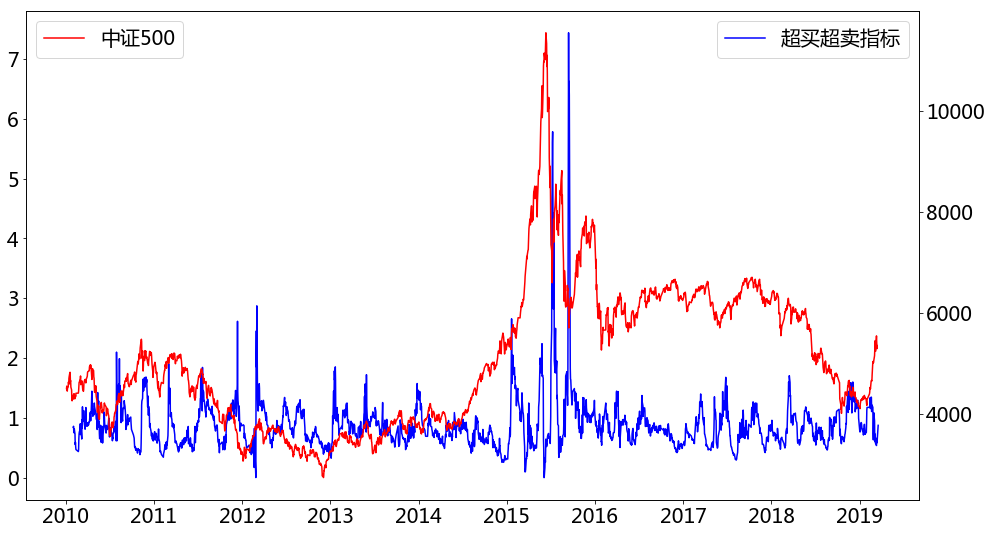

In [43]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(ratio, color='blue', label=u'超买超卖指标')
ax1.legend(fontsize=20)
ax2 = ax1.twinx()
ax2.plot(ind[ind.index >= '2010-01-01']['close'], color='red', label=u'中证500')
ax2.legend(fontsize=20, loc='upper left')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)